In [1]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/farhansayyed165/Highway-Data/main/Data/Traffic_Voilation/Traffic_Voilatio_mean.csv', index_col='Unnamed: 0')

y = df.filter(like="voilation", axis=1)
X = df.drop('voilation', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
def forest_training(X_train, X_test, y_train, y_test, estimators):
    cf = RandomForestClassifier(n_estimators=estimators,bootstrap=True )
    cf.fit(X_train, y_train.values.ravel())

    y_train_pred = cf.predict(X_train)
    y_pred = cf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    print("Node: {}, Acc: {}".format(estimators, accuracy))
    print("---------------------------------")

In [26]:
for i in range(20,100):
  forest_training(X_train, X_test, y_train, y_test, i)

Node: 20, Acc: 0.35185185185185186
---------------------------------
Node: 21, Acc: 0.3287037037037037
---------------------------------
Node: 22, Acc: 0.32407407407407407
---------------------------------
Node: 23, Acc: 0.3333333333333333
---------------------------------
Node: 24, Acc: 0.35185185185185186
---------------------------------
Node: 25, Acc: 0.3148148148148148
---------------------------------
Node: 26, Acc: 0.33796296296296297
---------------------------------
Node: 27, Acc: 0.3194444444444444
---------------------------------
Node: 28, Acc: 0.3472222222222222
---------------------------------
Node: 29, Acc: 0.3611111111111111
---------------------------------
Node: 30, Acc: 0.3425925925925926
---------------------------------
Node: 31, Acc: 0.3472222222222222
---------------------------------
Node: 32, Acc: 0.33796296296296297
---------------------------------
Node: 33, Acc: 0.3287037037037037
---------------------------------
Node: 34, Acc: 0.33796296296296297
--------

In [40]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [41]:
y_pred = forest.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.35648148148148145

In [43]:
cm = confusion_matrix(y_test, y_pred)

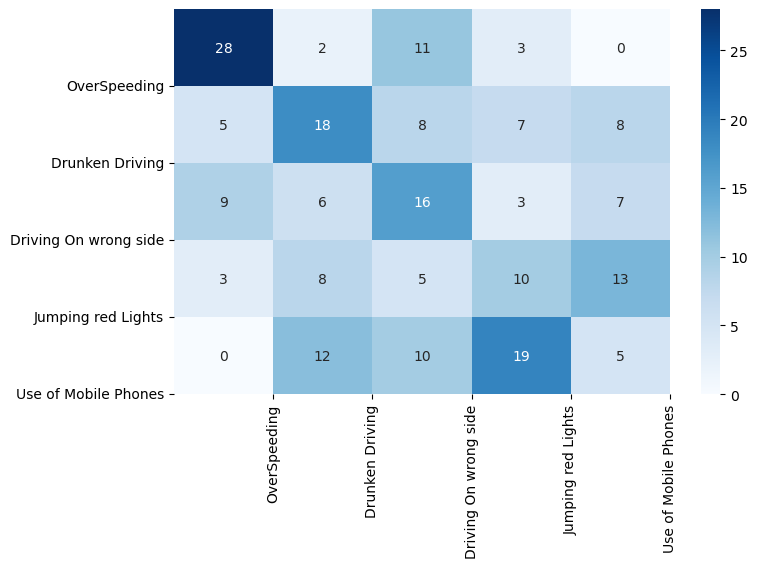

In [46]:
labels=['OverSpeeding','Drunken Driving','Driving On wrong side','Jumping red Lights','Use of Mobile Phones']
x=[1,2,3,4,5]
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xticks(x, labels, rotation = 90)
plt.yticks(x, labels, rotation = 0)
plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.64      0.63        44
           2       0.39      0.39      0.39        46
           3       0.32      0.39      0.35        41
           4       0.24      0.26      0.25        39
           5       0.15      0.11      0.13        46

    accuracy                           0.36       216
   macro avg       0.34      0.36      0.35       216
weighted avg       0.35      0.36      0.35       216



In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/farhansayyed165/Highway-Data/main/Data/Traffic_Voilation/3mean_data.csv')

y = df.filter(like="voilation", axis=1)
X = df.drop('voilation', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
for i in range(70,120):
  forest_training(X_train, X_test, y_train, y_test, i)

Node: 70, Acc: 0.39814814814814814
---------------------------------
Node: 71, Acc: 0.39814814814814814
---------------------------------
Node: 72, Acc: 0.37962962962962965
---------------------------------
Node: 73, Acc: 0.38425925925925924
---------------------------------
Node: 74, Acc: 0.37962962962962965
---------------------------------
Node: 75, Acc: 0.37962962962962965
---------------------------------
Node: 76, Acc: 0.4074074074074074
---------------------------------
Node: 77, Acc: 0.4027777777777778
---------------------------------
Node: 78, Acc: 0.39351851851851855
---------------------------------
Node: 79, Acc: 0.37037037037037035
---------------------------------
Node: 80, Acc: 0.3888888888888889
---------------------------------
Node: 81, Acc: 0.375
---------------------------------
Node: 82, Acc: 0.39351851851851855
---------------------------------
Node: 83, Acc: 0.37962962962962965
---------------------------------
Node: 84, Acc: 0.39351851851851855
----------------

In [56]:
cf = RandomForestClassifier(n_estimators=118,bootstrap=True )
cf.fit(X_train, y_train.values.ravel())

y_pred = cf.predict(X_test)

In [57]:
cm = confusion_matrix(y_test, y_pred)

In [58]:
cm

array([[27,  4,  9,  4,  0],
       [ 5, 16, 12,  6,  7],
       [ 0,  4, 25,  5,  7],
       [ 3,  8,  5,  9, 14],
       [ 1, 15,  7, 18,  5]], dtype=int64)

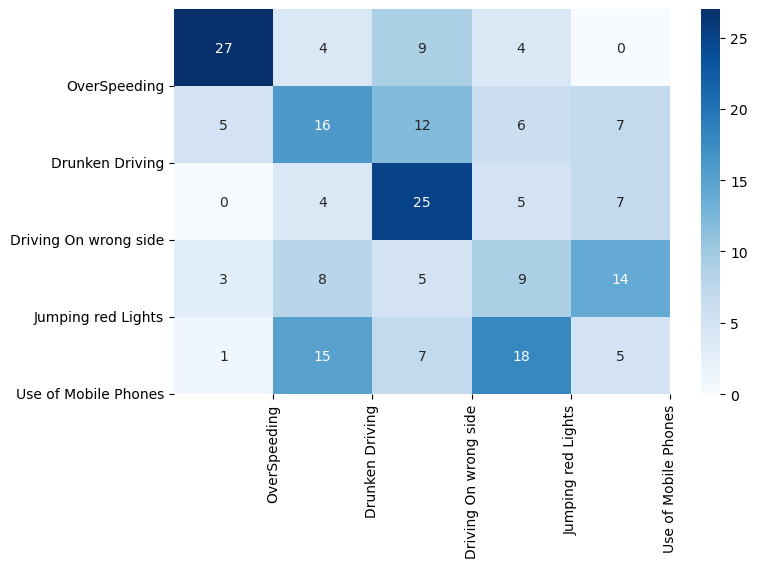

In [59]:
labels=['OverSpeeding','Drunken Driving','Driving On wrong side','Jumping red Lights','Use of Mobile Phones']
x=[1,2,3,4,5]
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xticks(x, labels, rotation = 90)
plt.yticks(x, labels, rotation = 0)
plt.show()